In this notebook various different models were tested, and there was some optimisation conducted.

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import optuna
import optuna.visualization as vis
import time

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder


import pickle

from sklearn.metrics import confusion_matrix, cohen_kappa_score, precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, make_scorer

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score


In [6]:
heart_data = "../data/clean/resampled_data.csv"
heart_df = pd.read_csv(heart_data)
drop_df = heart_df.drop(['PhysHlth', 'DiffWalk','Education', 'Veggies'],  axis=1)

In [9]:
# Performing train split 

target = drop_df['HeartDiseaseorAttack']
features = drop_df.drop('HeartDiseaseorAttack', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

target_base = heart_df['HeartDiseaseorAttack']
features_base = heart_df.drop('HeartDiseaseorAttack', axis=1)

x_train2, x_test2, y_train2, y_test2 = train_test_split(features_base, target_base, test_size=0.20, random_state=0)


In [11]:
#Normalise all columns to be 0-1
normalizer = MinMaxScaler()
normalizer.fit(x_train)

x_train_norm = normalizer.transform(x_train)
x_test_norm = normalizer.transform(x_test)

x_train_norm_df = pd.DataFrame(x_train_norm, columns=x_train.columns, index=x_train.index )
x_test_norm_df = pd.DataFrame(x_test_norm, columns=x_test.columns, index=x_test.index)

normalizer.fit(x_train2)

x_train_norm2 = normalizer.transform(x_train2)
x_test_norm2 = normalizer.transform(x_test2)

x_train_norm_df2 = pd.DataFrame(x_train_norm2, columns=x_train2.columns, index=x_train2.index )
x_test_norm_df2 = pd.DataFrame(x_test_norm2, columns=x_test2.columns, index=x_test2.index)

### KNN:

In [117]:
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(x_train_norm_df, y_train)
y_pred_knn = knn.predict(x_test_norm_df)

In [118]:
print(f"MAE: {mean_absolute_error(y_pred_knn, y_test): .4f}")
print(f"RMSE: {root_mean_squared_error(y_pred_knn, y_test): .4f}")
print(f"Recall: {recall_score(y_pred_knn, y_test): .4f}")
print(f"Precision: {precision_score(y_pred_knn, y_test): .4f}")
print(f"Kappa: {cohen_kappa_score(y_pred_knn, y_test): .4f}")

MAE:  0.2370
RMSE:  0.4868
Recall:  0.7428
Precision:  0.8028
Kappa:  0.5262


In [15]:
knn.fit(x_train_norm_df2, y_train2)
y_pred_knn2 = knn.predict(x_test_norm_df2)

print(f"MAE: {mean_absolute_error(y_pred_knn2, y_test2): .4f}")
print(f"RMSE: {root_mean_squared_error(y_pred_knn2, y_test2): .4f}")
print(f"Recall: {recall_score(y_pred_knn2, y_test2): .4f}")
print(f"Precision: {precision_score(y_pred_knn2, y_test2): .4f}")
print(f"Kappa: {cohen_kappa_score(y_pred_knn2, y_test2): .4f}")

MAE:  0.2555
RMSE:  0.5055
Recall:  0.7457
Precision:  0.7400
Kappa:  0.4890


### Random Forests:

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train_norm_df, y_train)
y_pred_rf = rf.predict(x_test_norm_df)

In [18]:
print(f"MAE: {mean_absolute_error(y_pred_rf, y_test): .4f}")
print(f"RMSE: {root_mean_squared_error(y_pred_rf, y_test): .4f}")
print(f"Recall: {recall_score(y_pred_rf, y_test): .4f}")
print(f"Precision: {precision_score(y_pred_rf, y_test): .4f}")
print(f"Kappa: {cohen_kappa_score(y_pred_rf, y_test): .4f}")

MAE:  0.2425
RMSE:  0.4925
Recall:  0.7426
Precision:  0.7862
Kappa:  0.5150


In [19]:
rf.fit(x_train_norm_df2, y_train2)
y_pred_rf2 = rf.predict(x_test_norm_df2)

print(f"MAE: {mean_absolute_error(y_pred_rf2, y_test2): .4f}")
print(f"RMSE: {root_mean_squared_error(y_pred_rf2, y_test2): .4f}")
print(f"Recall: {recall_score(y_pred_rf2, y_test2): .4f}")
print(f"Precision: {precision_score(y_pred_rf2, y_test2): .4f}")
print(f"Kappa: {cohen_kappa_score(y_pred_rf2, y_test2): .4f}")

MAE:  0.2341
RMSE:  0.4839
Recall:  0.7477
Precision:  0.8005
Kappa:  0.5318


### Gradient Boosting:

In [21]:
gb = GradientBoostingClassifier(max_depth=10, n_estimators=50)

gb.fit(x_train_norm_df, y_train)
y_pred_gb = gb.predict(x_test_norm_df)

In [22]:
print(f"MAE: {mean_absolute_error(y_pred_gb, y_test): .4f}")
print(f"RMSE: {root_mean_squared_error(y_pred_gb, y_test): .4f}")
print(f"Recall: {recall_score(y_pred_gb, y_test): .4f}")
print(f"Precision: {precision_score(y_pred_gb, y_test): .4f}")
print(f"Kappa: {cohen_kappa_score(y_pred_gb, y_test): .4f}")

MAE:  0.2332
RMSE:  0.4829
Recall:  0.7483
Precision:  0.8021
Kappa:  0.5337


In [23]:
gb.fit(x_train_norm_df2, y_train2)
y_pred_gb2 = gb.predict(x_test_norm_df2)

print(f"MAE: {mean_absolute_error(y_pred_gb2, y_test2): .4f}")
print(f"RMSE: {root_mean_squared_error(y_pred_gb2, y_test2): .4f}")
print(f"Recall: {recall_score(y_pred_gb2, y_test2): .4f}")
print(f"Precision: {precision_score(y_pred_gb2, y_test2): .4f}")
print(f"Kappa: {cohen_kappa_score(y_pred_gb2, y_test2): .4f}")

MAE:  0.2310
RMSE:  0.4806
Recall:  0.7490
Precision:  0.8072
Kappa:  0.5381


### Adaptive Boosting:

In [25]:
ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab.fit(x_train_norm_df, y_train)
y_pred_ab = ab.predict(x_test_norm_df)

C:\Users\olgeo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [26]:
print(f"MAE: {mean_absolute_error(y_pred_ab, y_test2): .4f}")
print(f"RMSE: {root_mean_squared_error(y_pred_ab, y_test2): .4f}")
print(f"Recall: {recall_score(y_pred_ab, y_test2): .4f}")
print(f"Precision: {precision_score(y_pred_ab, y_test2): .4f}")
print(f"Kappa: {cohen_kappa_score(y_pred_ab, y_test2): .4f}")

MAE:  0.2263
RMSE:  0.4757
Recall:  0.7623
Precision:  0.7935
Kappa:  0.5474


In [27]:
ab.fit(x_train_norm_df2, y_train2)
y_pred_ab2 = ab.predict(x_test_norm_df2)

print(f"MAE: {mean_absolute_error(y_pred_ab2, y_test2): .4f}")
print(f"RMSE: {root_mean_squared_error(y_pred_ab2, y_test2): .4f}")
print(f"Recall: {recall_score(y_pred_ab2, y_test2): .4f}")
print(f"Precision: {precision_score(y_pred_ab2, y_test2): .4f}")
print(f"Kappa: {cohen_kappa_score(y_pred_ab2, y_test2): .4f}")

C:\Users\olgeo\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


MAE:  0.2248
RMSE:  0.4742
Recall:  0.7640
Precision:  0.7946
Kappa:  0.5504


### Accuracy:

In [29]:
print(f'Accuracy (KNN): {accuracy_score(y_test, y_pred_knn): .4f}')
print(f'Accuracy (Random Forest): {accuracy_score(y_test, y_pred_rf): .4f}')
print(f'Accuracy (XGBoost): {accuracy_score(y_test, y_pred_gb): .4f}')
print(f'Accuracy (AdaBoost): {accuracy_score(y_test, y_pred_ab): .4f}')

Accuracy (KNN):  0.7572
Accuracy (Random Forest):  0.7575
Accuracy (XGBoost):  0.7668
Accuracy (AdaBoost):  0.7737


### Recall:

In [31]:
print(f'Recall (KNN): {recall_score(y_test, y_pred_knn): .4f}')
print(f'Recall (Random Forest): {recall_score(y_test, y_pred_rf): .4f}')
print(f'Recall (Grad Boost): {recall_score(y_test, y_pred_gb): .4f}')
print(f'Recall (AdaBoost): {recall_score(y_test, y_pred_ab): .4f}')

Recall (KNN):  0.7503
Recall (Random Forest):  0.7862
Recall (Grad Boost):  0.8021
Recall (AdaBoost):  0.7935


In [58]:
print("For original dataset")
print(f'Recall (KNN): {recall_score(y_test2, y_pred_knn2): .4f}')
print(f'Recall (Random Forest): {recall_score(y_test, y_pred_rf2): .4f}')
print(f'Recall (Grad Boost): {recall_score(y_test2, y_pred_gb2): .4f}')
print(f'Recall (AdaBoost): {recall_score(y_test2, y_pred_ab2): .4f}')

For original dataset
Recall (KNN):  0.7400
Recall (Random Forest):  0.8005
Recall (Grad Boost):  0.8072
Recall (AdaBoost):  0.7946


### Cohen's Kappa:

In [33]:
print("For the dropped data")
print(f'Kappa (KNN): {cohen_kappa_score(y_test, y_pred_knn): .4f}')
print(f'Kappa (Random Forest): {cohen_kappa_score(y_test, y_pred_rf): .4f}')
print(f'Kappa (Grad Boost): {cohen_kappa_score(y_test, y_pred_gb): .4f}')
print(f'Kappa (AdaBoost): {cohen_kappa_score(y_test, y_pred_ab): .4f}')

For the dropped data
Kappa (KNN):  0.5143
Kappa (Random Forest):  0.5150
Kappa (Grad Boost):  0.5337
Kappa (AdaBoost):  0.5474


In [34]:
print("For the original data")
print(f'Kappa (KNN): {cohen_kappa_score(y_test2, y_pred_knn2): .4f}')
print(f'Kappa (Random Forest): {cohen_kappa_score(y_test2, y_pred_rf2): .4f}')
print(f'Kappa (Grad Boost): {cohen_kappa_score(y_test2, y_pred_gb2): .4f}')
print(f'Kappa (AdaBoost): {cohen_kappa_score(y_test2, y_pred_ab2): .4f}')

For the original data
Kappa (KNN):  0.4890
Kappa (Random Forest):  0.5318
Kappa (Grad Boost):  0.5381
Kappa (AdaBoost):  0.5504


## Optimise KNN:

In [103]:
def objective(trial, confidence_level, folds):

    # First, we define the grid with values to consider when train several possible combinations.
    # Now we specify a range/list of values to try for each hyper-parameter, and we let optuna to decide which
    # combination to try.
    n_neighbors = trial.suggest_int("n_neighbors", 2, 25)
    weights = trial.suggest_categorical("weights", ['uniform', 'distance'])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)

    scorer = make_scorer(recall_score)
    # Here the parameter "cv" specifies the number of folds K
    scores = cross_val_score(knn, x_train_norm_df, y_train, cv=folds, scoring=scorer) # The scores provided will be the R2 on each hold out fold
    mean_score = np.mean(scores)
    sem = np.std(scores, ddof=1) / np.sqrt(folds)

    tc = st.t.ppf(1-((1-confidence_level)/2), df=folds-1)
    lower_bound = mean_score - ( tc * sem )
    upper_bound = mean_score + ( tc * sem )

    # Here, we're storing confidence interval for each trial. It's not possible for the objective function to return
    # multiple values as Optuna uses the only returned value to find the best combination of hyperparameters.
    trial.set_user_attr("CV_score_summary", [round(lower_bound,4), round(np.mean(scores),4), round(upper_bound,4)])

    return np.mean(scores)

In [105]:
confidence_level = 0.95
folds = 5

start_time = time.time()
study = optuna.create_study(direction="maximize") # We want to have the maximum values for the Recall scores
study.optimize(lambda trial: objective(trial, confidence_level, folds), n_trials=15)
end_time = time.time()

print("\n")
print(f"Time taken to find the best combination of hyperparameters among the given ones: {end_time - start_time: .4f} seconds")
print("\n")
print("The best combination of hyperparameters found was: ", study.best_params)
print(f"The best recall score found was: {study.best_value: .4f}")

[I 2024-12-05 13:21:37,921] A new study created in memory with name: no-name-885d74f9-99fc-437e-afcd-bb6ea085fd7c
[I 2024-12-05 13:21:45,518] Trial 0 finished with value: 0.779943803832737 and parameters: {'n_neighbors': 18, 'weights': 'distance'}. Best is trial 0 with value: 0.779943803832737.
[I 2024-12-05 13:21:58,839] Trial 1 finished with value: 0.7963085459310053 and parameters: {'n_neighbors': 17, 'weights': 'uniform'}. Best is trial 1 with value: 0.7963085459310053.
[I 2024-12-05 13:22:07,885] Trial 2 finished with value: 0.7790549832757636 and parameters: {'n_neighbors': 17, 'weights': 'distance'}. Best is trial 1 with value: 0.7963085459310053.
[I 2024-12-05 13:22:14,263] Trial 3 finished with value: 0.7529139940346237 and parameters: {'n_neighbors': 7, 'weights': 'distance'}. Best is trial 1 with value: 0.7963085459310053.
[I 2024-12-05 13:22:25,212] Trial 4 finished with value: 0.7338833369207588 and parameters: {'n_neighbors': 3, 'weights': 'uniform'}. Best is trial 1 with



Time taken to find the best combination of hyperparameters among the given ones:  155.8947 seconds


The best combination of hyperparameters found was:  {'n_neighbors': 23, 'weights': 'uniform'}
The best recall score found was:  0.7992


In [106]:
results = sorted([(index,
  trial.user_attrs['CV_score_summary'][0],
  trial.user_attrs['CV_score_summary'][1],
  trial.user_attrs['CV_score_summary'][2]) for index, trial in enumerate(study.trials)], key=lambda x: x[2], reverse=True)

print(f"The Recall Score confidence interval for the best combination of hyper parameters is: {results[0][1:]}")

The Recall Score confidence interval for the best combination of hyper parameters is: (0.7869, 0.7992, 0.8115)


In [115]:
best_model_knn = KNeighborsClassifier(**study.best_params)
best_model_knn.fit(x_train_norm_df, y_train)
y_pred_test_df = best_model_knn.predict(x_test_norm_df)

print(f"Test MAE: {mean_absolute_error(y_pred_test_df, y_test): .3f}")
print(f"Test MSE: {mean_squared_error(y_pred_test_df, y_test): .3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_pred_test_df, y_test)):.3f}")
print(f"Test Recall:  {recall_score(y_pred_test_df, y_test): .3f}")
print(f"Test Precision: {precision_score(y_pred_test_df, y_test): .3f}")
print(f"Test Kappa:  {cohen_kappa_score(y_pred_test_df, y_test): .3f}")


Test MAE:  0.237
Test MSE:  0.237
Test RMSE: 0.487
Test Recall:   0.743
Test Precision:  0.803
Test Kappa:   0.526


## Optimise random forest:

In [13]:
def rf_objective(trial, confidence_level, folds):
    # Hyperparameters to tune
    n_estimators = trial.suggest_int("n_estimators", 50, 150)
    max_depth = trial.suggest_int("max_depth", 5, 10)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 7)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 7)
    max_features = trial.suggest_categorical("max_features", ['sqrt', 'log2'])

    # Initialize the RandomForestClassifier with the hyperparameters
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf,
                                max_features=max_features,
                                random_state=0)

    # Scorer for recall
    scorer = make_scorer(recall_score)

    # Cross-validation scores
    scores = cross_val_score(rf, x_train_norm_df, y_train, cv=folds, scoring=scorer)

    mean_score = np.mean(scores)
    sem = np.std(scores, ddof=1) / np.sqrt(folds)

    # Confidence interval (optional)
    tc = st.t.ppf(1 - ((1 - confidence_level) / 2), df=folds - 1)
    lower_bound = mean_score - (tc * sem)
    upper_bound = mean_score + (tc * sem)

    # Store confidence interval for each trial
    trial.set_user_attr("CV_score_summary", [round(lower_bound, 4), round(np.mean(scores), 4), round(upper_bound, 4)])

    mean_score = np.mean(scores)
    return mean_score

In [15]:
confidence_level = 0.95
folds = 5

start_time = time.time()

# Create Optuna study for maximizing recall score
study_rf = optuna.create_study(direction="maximize")  # Maximizing recall score
study_rf.optimize(lambda trial: rf_objective(trial, confidence_level, folds), n_trials=25)

end_time = time.time()

# Print out the time taken
print(f"\nTime taken to find the best combination of hyperparameters: {end_time - start_time: .4f} seconds")
print("\n")

# Print out the best combination of hyperparameters
print("The best combination of hyperparameters found was: ", study_rf.best_params)
print(f"The best recall score found was: {study_rf.best_value: .4f}")

[I 2024-12-06 00:35:19,133] A new study created in memory with name: no-name-5b4e4343-e560-4110-890b-cdf07261cdb7
[I 2024-12-06 00:35:22,834] Trial 0 finished with value: 0.8242275999439679 and parameters: {'n_estimators': 65, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8242275999439679.
[I 2024-12-06 00:35:33,268] Trial 1 finished with value: 0.8255869540707031 and parameters: {'n_estimators': 142, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.8255869540707031.
[I 2024-12-06 00:35:37,701] Trial 2 finished with value: 0.8231817526452992 and parameters: {'n_estimators': 60, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 1 with value: 0.8255869540707031.
[I 2024-12-06 00:35:44,184] Trial 3 finished with value: 0.8221888899138676 and parameters: {'n_estimators': 126, 'max_depth': 5, 'min_s


Time taken to find the best combination of hyperparameters:  186.5958 seconds


The best combination of hyperparameters found was:  {'n_estimators': 141, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
The best recall score found was:  0.8261


In [43]:
# Train the model with the best hyperparameters
best_rf = RandomForestClassifier(**study_rf.best_params, random_state=0)
best_rf.fit(x_train_norm_df, y_train)

# Make predictions on the test set
y_pred_rf = best_rf.predict(x_test_norm_df)

# Evaluate the model
from sklearn.metrics import recall_score, precision_score, f1_score, mean_absolute_error, mean_squared_error

print(f"Test MAE: {mean_absolute_error(y_pred_rf, y_test): .3f}")
print(f"Test MSE: {mean_squared_error(y_pred_rf, y_test): .3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_pred_rf, y_test)):.3f}")
print(f"Test Recall:  {recall_score(y_pred_rf, y_test): .3f}")
print(f"Test Precision: {precision_score(y_pred_rf, y_test): .6f}")
print(f"Test Kappa Score:  {cohen_kappa_score(y_pred_rf, y_test): .3f}")

Test MAE:  0.224
Test MSE:  0.224
Test RMSE: 0.473
Test Recall:   0.750
Test Precision:  0.826060
Test Kappa Score:   0.553


In [45]:
from sklearn.metrics import classification_report

report_rf = classification_report(y_test, y_pred_rf)
print(f'Classification Report:\n{report_rf}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77      4792
         1.0       0.75      0.83      0.79      4766

    accuracy                           0.78      9558
   macro avg       0.78      0.78      0.78      9558
weighted avg       0.78      0.78      0.78      9558



The Recall confidence interval for the best combination of hyperparameters is: (0.8175, 0.8261, 0.8346)


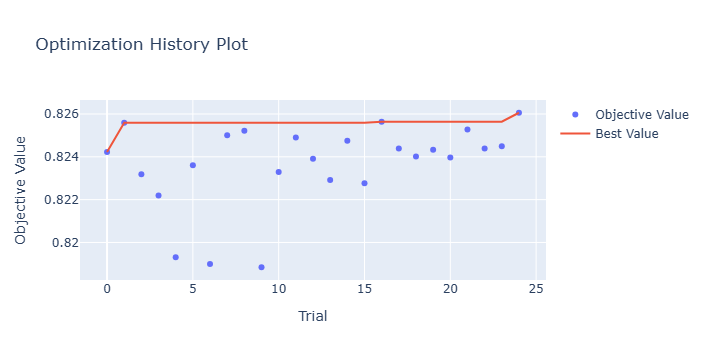

In [39]:
results = sorted([(index,
  trial.user_attrs['CV_score_summary'][0],
  trial.user_attrs['CV_score_summary'][1],
  trial.user_attrs['CV_score_summary'][2]) for index, trial in enumerate(study_rf.trials)], key=lambda x: x[2], reverse=True)

print(f"The Recall confidence interval for the best combination of hyperparameters is: {results[0][1:]}")
vis.plot_optimization_history(study_rf)

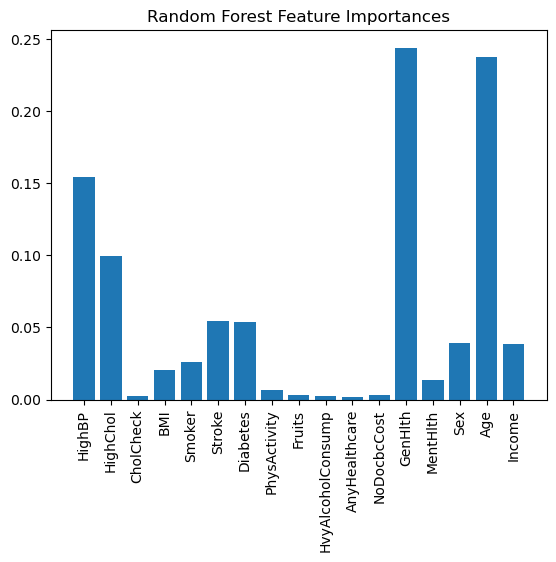

In [35]:
feature_importances_rf = best_rf.feature_importances_
plt.bar(x_train_norm_df.columns, feature_importances_rf)
plt.xticks(rotation=90)
plt.title('Random Forest Feature Importances')
plt.show()

In [37]:
list(feature_importances_rf)


[0.1538952931926448,
 0.09923000573882866,
 0.002377513141864102,
 0.020475349018409254,
 0.02605391559424304,
 0.054558369837190535,
 0.05396318931911783,
 0.006274660953771401,
 0.003320180960095733,
 0.0025475122661242243,
 0.0019299893066945558,
 0.0033539988334460786,
 0.24389262458260186,
 0.013279914182917405,
 0.03923589880083307,
 0.23702903863251842,
 0.03858254563869905]

In [33]:
list(x_train_norm_df.columns)

['HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoker',
 'Stroke',
 'Diabetes',
 'PhysActivity',
 'Fruits',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'Sex',
 'Age',
 'Income']